<a href="https://colab.research.google.com/github/josemacoel/4-Extraccion-de-Caracteristicas/blob/main/Actividad_4_Extracci%C3%B3n_caracter%C3%ADsticas_A01734153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4**
## **José María Colombres Elguea | A01734153**

In [18]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached funpymodeling-0.1.7-py3-none-any.whl (6.4 kB)
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=81fb9dd3dd6f5357bb0f574e7621b1251e8e6f1b7b94765b35193ed5a3ec5fb1
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


## **Preparación**

In [19]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [20]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [21]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [22]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [23]:
Micro_Retailer.columns

Index(['_record_id', '_title', '_server_updated_at', '_updated_by',
       '_geometry', '_latitude', '_longitude', '228_store_name',
       '229_store_picture', '232_type_of_store',
       ...
       '261_technology_organization', '262_technology_serve_customers',
       '263_technology_secure_sales', '264_technology_budget',
       '267_technology_investment_customer_preferences',
       '234_willingness_participate_workshop', '318_shopkeeper_name',
       '319_shopkeepers_last_name', '236_whatsapp', '235_email'],
      dtype='object', length=106)

# **Filtro de 20 variables**

Primero se seleccionaron 20 columnas que me parecieron de alto interés después de analizar el archivo de Excel

In [24]:
filtro = Micro_Retailer.loc[:, ['_updated_by', '108_does_the_micro_retailer_has_a_barred_window_','232_type_of_store',
                            '99_does_the_micro_retailer_exhibits_products_outside_','2_current_permanent_employees',
                            '6_change_employees_average_salary_last_year','20_reviews_finances_monthly',
                            '18_sales_records','189_payment_methods','214_customer_relationship_tools',
                            '33_credit_to_customers','38_average_margin_profits','313_home_deliveries',
                            '56_procurement_changes_pandemic','157_frequency_organize_shelves',
                            '163_number_high_perishable_products','250_technology_investment_operations',
                            '234_willingness_participate_workshop','312_payment_of_utilities',
                            '227_agreement_ecommerce_platforms']]

A continuación se sustituyeron los datos nulos por: Sin registro

In [25]:
#LLenar los nulos con Sin registro y posteriormente guardarlo como df
filtro.fillna('Sin registro', inplace=True)
df=filtro

In [26]:
#Conteo de nulos
df.isnull().sum()

_updated_by                                              0
108_does_the_micro_retailer_has_a_barred_window_         0
232_type_of_store                                        0
99_does_the_micro_retailer_exhibits_products_outside_    0
2_current_permanent_employees                            0
6_change_employees_average_salary_last_year              0
20_reviews_finances_monthly                              0
18_sales_records                                         0
189_payment_methods                                      0
214_customer_relationship_tools                          0
33_credit_to_customers                                   0
38_average_margin_profits                                0
313_home_deliveries                                      0
56_procurement_changes_pandemic                          0
157_frequency_organize_shelves                           0
163_number_high_perishable_products                      0
250_technology_investment_operations                    

In [27]:
#Obtengo un análisis univariado de las variables seleccionadas
freq_tbl(df)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

# **Análisis por columnas**

## **Columna _updated_by**

In [28]:
#Análisis variado de la columna
table1= freq_tbl(df['_updated_by'])
table1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [29]:
#Filtro de valores mayores al número seleccionado
Filtro= table1[table1['frequency']>1]
Filtro

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [30]:
#Ajustar índice
Filtro_index= Filtro.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


Text(0, 0.5, 'Frecuencia')

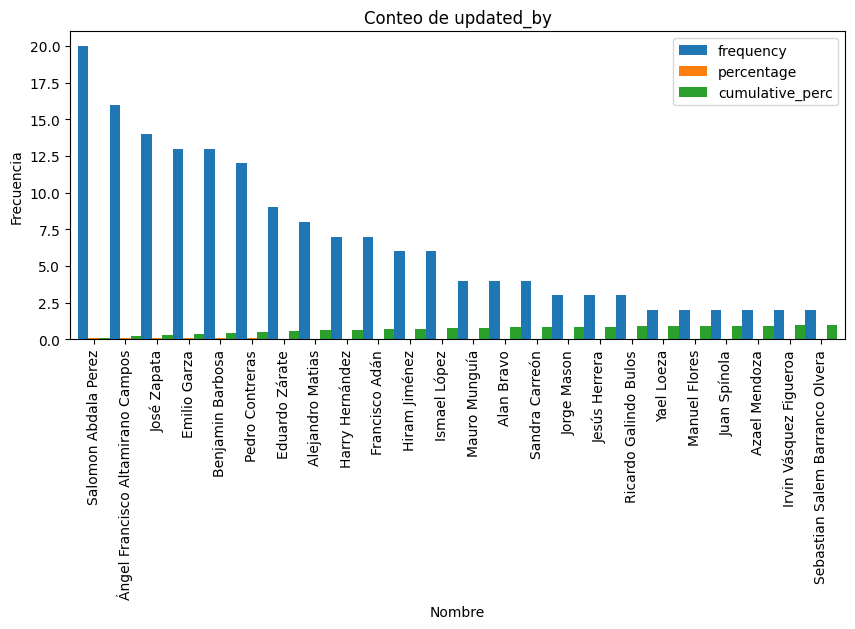

In [31]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Conteo de updated_by')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

**Interpretación**

Esta columna muestra a las personas que tuvieron acceso a la actualización del documento y cuantas veces pudieron actualizarlo. Se filtro a aquellas personas que lo actualizaron más de una vez, y a partir de esto se pueden obtener insights entorno a quien tuvo más paryicipación física en el documento o por otro lado a la eficiencia de cada uno de los encargados. La persona que más actualizó el documento fue Salomon Abdala. 

## **Columna 108_does_the_micro_retailer_has_a_barred_window_**

In [32]:
#Análisis variado de la columna
table2= freq_tbl(df['108_does_the_micro_retailer_has_a_barred_window_'])
table2

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [33]:
#Filtro de valores mayores al número seleccionado
Filtro= table2[table2['frequency']>0]
Filtro

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [34]:
#Ajustar índice
Filtro_index= Filtro.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


<Axes: ylabel='frequency'>

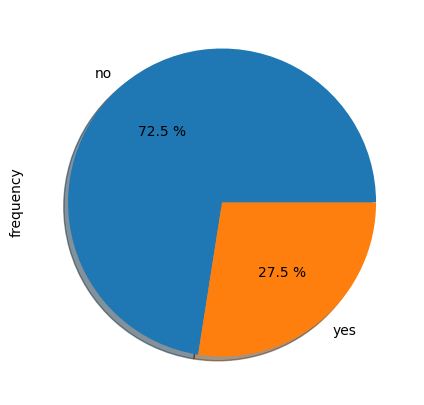

In [35]:
#Gráfico de pastel
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Análisis e Interpretación**

Las tablas y gráfica muestran aquellas tiendas de autoservicio que cuentan con una ventana de barrotes. Estas ventanas son comunes en las tiendas de retail en México, muchas veces asociadas a motivos de seguridad, pero también de practicidad. El 27% de las tiendas de retial que fueron analizadas cuenta con este tipo de ventanas o mostrador, lo que indica que muchos dueños de tiendas se preocupan por eso. 

## **Columna 232_type_of_store**

In [36]:
#Análisis variado de la columna
table3= freq_tbl(df['232_type_of_store'])
table3

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [37]:
#Filtro de valores mayores al número seleccionado
Filtro= table3[table3['frequency']>1]
Filtro

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [38]:
#Ajustar índice
Filtro_index= Filtro.set_index('232_type_of_store')
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


Text(0, 0.5, 'Frecuencia')

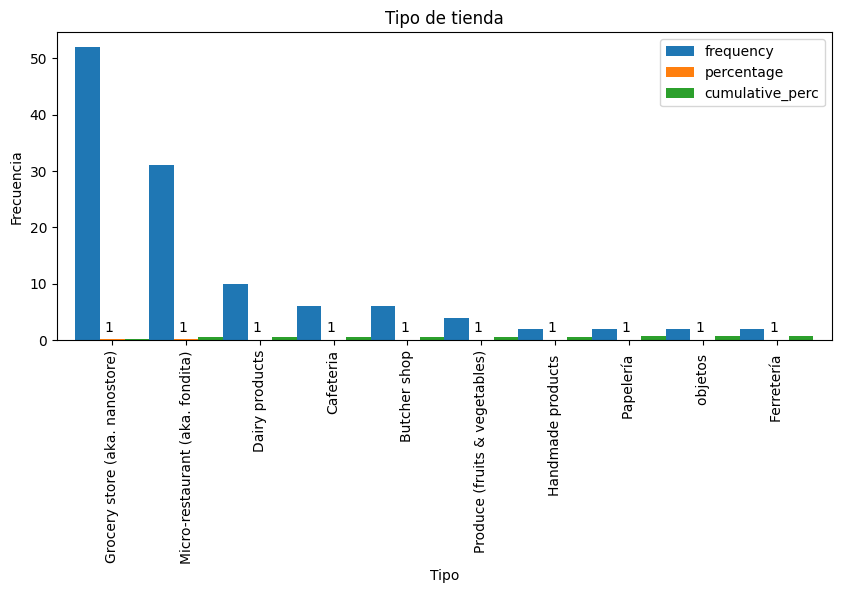

In [39]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
for i, v in enumerate(Filtro_index.value_counts()):
    plt.text(i - 0.1, v + 0.5, str(v))
plt.title('Tipo de tienda')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**
El tipo de tienda más común dentro de 


## **Columna 99_does_the_micro_retailer_exhibits_products_outside_**

In [40]:
#Análisis variado de la columna
table4= freq_tbl(df['99_does_the_micro_retailer_exhibits_products_outside_'])
table4

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [41]:
#Filtro de valores mayores al número seleccionado
Filtro= table4[table4['frequency']>1]
Filtro

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [42]:
#Ajustar índice
Filtro_index= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


<Axes: ylabel='frequency'>

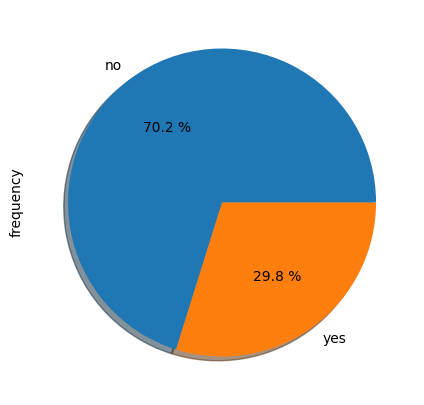

In [43]:
#Gráfico de pastel
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Análisis e Interpretación**

La mayoría de los comercios de retail dentro de la investigación no exhiben productos fuera de la tienda. Esto puede explicarse debido a la homogenización de las tiendas de retail seleccionadas, pues las "tienditas" son las que por lo general lo realizan de esta forma. 

## **Columna 2_current_permanent_employees**

In [44]:
#Análisis variado de la columna
table5= freq_tbl(df['2_current_permanent_employees'])
table5

,2_current_permanent_employees,frequency,percentage,cumulative_perc
0,Sin registro,60,0.350877,0.350877
1,1.0,33,0.192982,0.543860
2,2.0,26,0.152047,0.695906
3,0.0,26,0.152047,0.847953
4,3.0,11,0.064327,0.912281
5,4.0,10,0.058480,0.970760
6,5.0,3,0.017544,0.988304
7,50.0,1,0.005848,0.994152
8,6.0,1,0.005848,1.000000


In [45]:
#Filtro de valores mayores al número seleccionado
Filtro= table5[table5['frequency']>1]
Filtro

,2_current_permanent_employees,frequency,percentage,cumulative_perc
0,Sin registro,60,0.350877,0.350877
1,1.0,33,0.192982,0.543860
2,2.0,26,0.152047,0.695906
3,0.0,26,0.152047,0.847953
4,3.0,11,0.064327,0.912281
5,4.0,10,0.058480,0.970760
6,5.0,3,0.017544,0.988304


In [46]:
#Ajustar índice
Filtro_index= Filtro.set_index('2_current_permanent_employees')
Filtro_index

,frequency,percentage,cumulative_perc
2_current_permanent_employees,,,
Sin registro,60,0.350877,0.350877
1.0,33,0.192982,0.543860
2.0,26,0.152047,0.695906
0.0,26,0.152047,0.847953
3.0,11,0.064327,0.912281
4.0,10,0.058480,0.970760
5.0,3,0.017544,0.988304


Text(0, 0.5, 'Frecuencia')

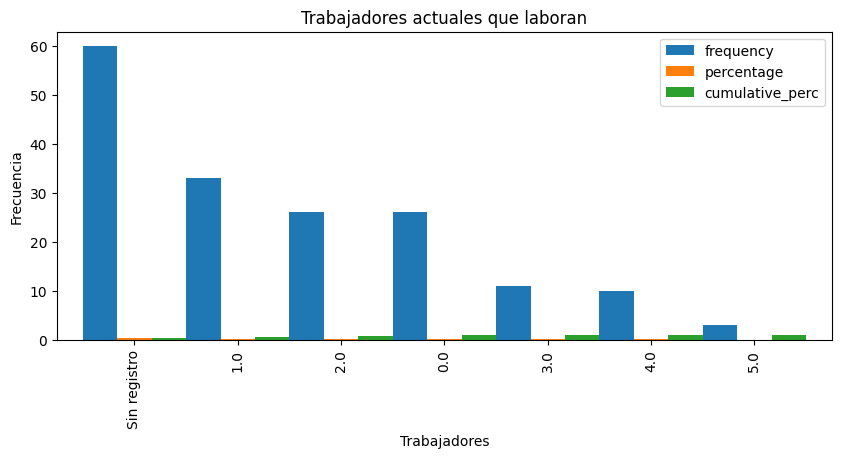

In [47]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Trabajadores actuales que laboran')
plt.xlabel('Trabajadores')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**

Se puede observar que no se tiene registro de una gran parte de los establecimientos. Esto quizá es debido a la desconfianza presente en el país o incluso que varía, que el dueño de alguna tienda de retail está y contrara personal eventual. Por otro lado, al analizar las variables numéricas se puede observar que siguen una tendencia proporcional, con 1 persona como el top of mind. 

## **Columna 6_change_employees_average_salary_last_year**

In [48]:
#Análisis variado de la columna
table6= freq_tbl(df['6_change_employees_average_salary_last_year'])
table6

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,Sin registro,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216
6,Disminuyó 25%,3,0.017544,0.970760
7,Dependiente,1,0.005848,0.976608
8,Disminuyó 50% o más,1,0.005848,0.982456
9,0,1,0.005848,0.988304


In [49]:
#Filtro de valores mayores al número seleccionado
Filtro= table6[table6['frequency']>1]
Filtro

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,Sin registro,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216
6,Disminuyó 25%,3,0.017544,0.970760


In [50]:
#Ajustar índice
Filtro_index= Filtro.set_index('6_change_employees_average_salary_last_year')
Filtro_index

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
Sin registro,86,0.502924,0.502924
No cambió,50,0.292398,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216
Disminuyó 25%,3,0.017544,0.970760


Text(0, 0.5, 'Frecuencia')

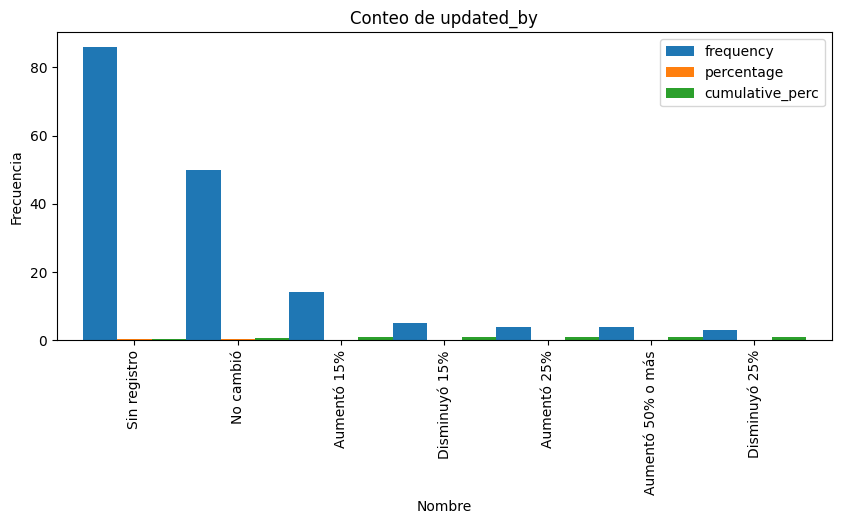

In [51]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Conteo de updated_by')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**

Se puede observar que la variable más común fue sin registro. Se infiere que esto es debido a que la gran mayoría de personas en México, sobretodo jefes o propios empleados, no les gusta revelar detalles sobre los cambios o monto en el sueldo. La segunda variable con mayor frecuencia es no cambió, y esto coincide con la propia actualidad de la economía en México. A pesar de ello, es una buena señal que el salario haya disminuido con mucho menor frecuencia. 

## **Columna 20_reviews_finances_monthly**

In [52]:
#Análisis variado de la columna
table7= freq_tbl(df['20_reviews_finances_monthly'])
table7

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,79,0.461988,0.461988
1,Sin registro,63,0.368421,0.830409
2,no,29,0.169591,1.000000


In [53]:
#Filtro de valores mayores al número seleccionado
Filtro= table7[table7['frequency']>1]
Filtro

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,79,0.461988,0.461988
1,Sin registro,63,0.368421,0.830409
2,no,29,0.169591,1.000000


In [54]:
#Ajustar índice
Filtro_index= Filtro.set_index('20_reviews_finances_monthly')
Filtro_index

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,79,0.461988,0.461988
Sin registro,63,0.368421,0.830409
no,29,0.169591,1.000000


<Axes: xlabel='20_reviews_finances_monthly'>

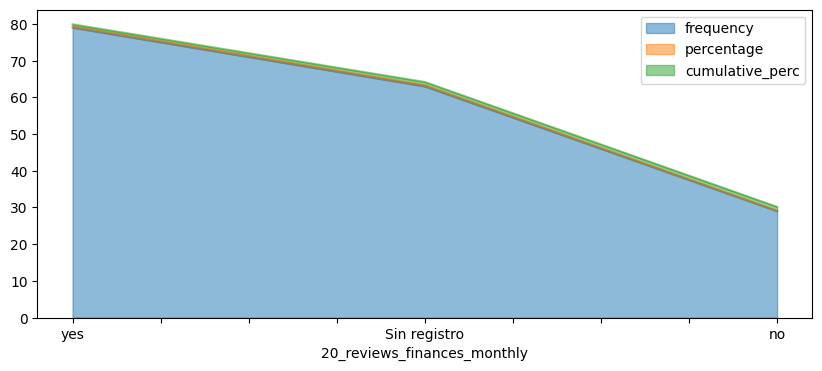

In [55]:
#Gráfico de área
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

**Análisis e Interpretación**

Se puede observar que una gran mayoría de los establecimientos de retail particpantes afirmaron revisar sus finanzas mensualmente. Esto en números es un insight positivo, pero cualitativamente hablando, se debe definir que tipo de revisión se realiza o que se entiende por el cocnepto de finanzas. De igual forma se puede observar que aquellos valores sin registro podrían pertenecer a tiendas que no realizan revisión. 

## **Columna 18_sales_records**

In [56]:
#Análisis variado de la columna
table8= freq_tbl(df['18_sales_records'])
table8

,18_sales_records,frequency,percentage,cumulative_perc
0,Sin registro,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
8,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.959064
9,Contadora,1,0.005848,0.964912


En este paso se eliminaron para el frame de análisis los valores únicos, pues al analizarlos se ven revueltos. 

In [57]:
#Filtro de valores mayores al número seleccionado
Filtro= table8[table8['frequency']>1]
Filtro

,18_sales_records,frequency,percentage,cumulative_perc
0,Sin registro,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368


In [58]:
#Ajustar índice
Filtro_index= Filtro.set_index('18_sales_records')
Filtro_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
Sin registro,61,0.356725,0.356725
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


Text(0, 0.5, 'Frecuencia')

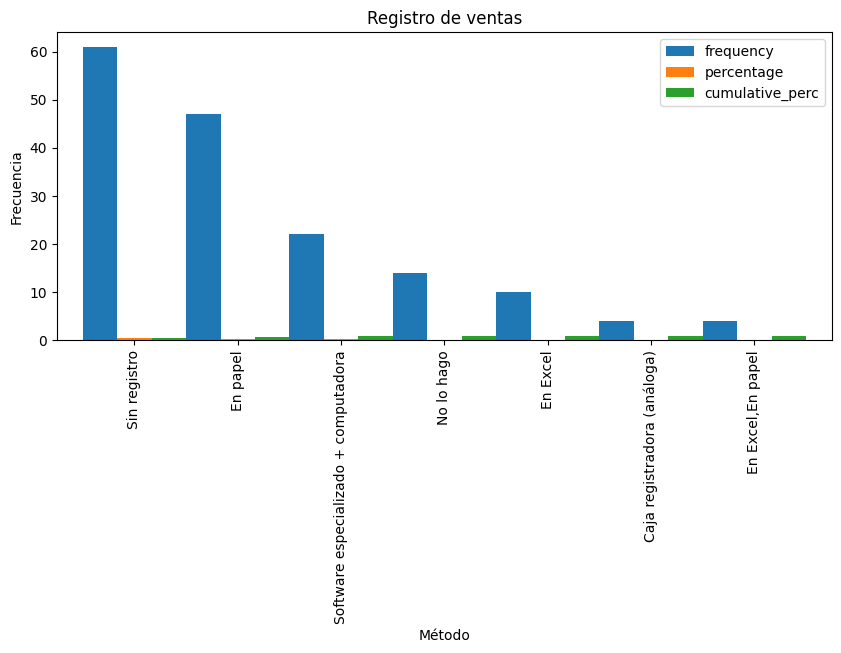

In [59]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Registro de ventas')
plt.xlabel('Método')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**

Dejando a un lado la variable de sin registro, el segundo método más utilizado es en papel. Posiblemente este método sea utilizado por "tienditas" o tiendas de abarrotes más pequeñas. Posteriormente se encuentra el software especializado y computadora, que probablemente sea utilizado por cadenas de retail o autoservicio más avanzadas. Quizá era un resultado esperado que algunas tiendas no lleven el control de ventas, sobretodo si se encuentran en la ifnormalidad dentro del mercado mexicano. 

## **Columna 189_payment_methods**
                    

In [60]:
#Análisis variado de la columna
table9= freq_tbl(df['189_payment_methods'])
table9

,189_payment_methods,frequency,percentage,cumulative_perc
0,Sin registro,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
6,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
7,Tarjeta de débito y/o crédito,1,0.005848,1.000000


En este paso se eliminaron para el frame de análisis los valores únicos, pues al analizarlos se ven revueltos. 

In [61]:
#Filtro de valores mayores al número seleccionado
Filtro= table9[table9['frequency']>1]
Filtro

,189_payment_methods,frequency,percentage,cumulative_perc
0,Sin registro,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


In [62]:
#Ajustar índice
Filtro_index= Filtro.set_index('189_payment_methods')
Filtro_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Sin registro,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


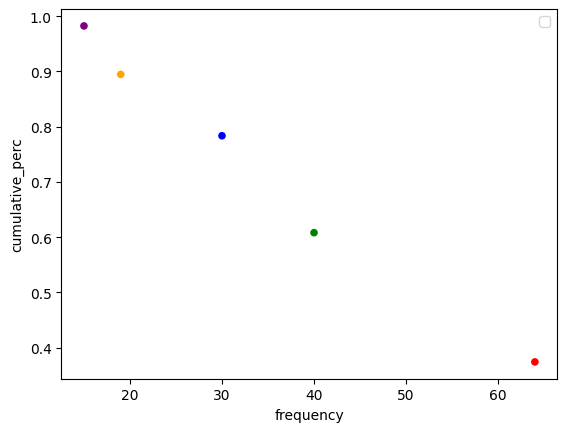

In [63]:
#Gráfico de dispersión
colors = ['red', 'green', 'blue', 'orange', 'purple']

Filtro_index.plot("frequency", "cumulative_perc", kind="scatter", c=colors)
plt.legend()
plt.show() 


**Análisis e Intepretación**

Se puede observar que la variable más común es sin registro. Le sigue pago en efectivo, lo que es sumamente común tomando en cuenta qye muchas tiendas de retail no cuentan con herramientas tecnológicas. Le sigue la variable Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria , que posiblemente es la 3 con mayor frecuencia por la transferencia, ya que se ha vuelto un modo común de pago. 

## **Columna 33_credit_to_customers**



In [64]:
#Análisis variado de la columna
table10= freq_tbl(df['33_credit_to_customers'])
table10

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,80,0.467836,0.467836
1,Sin registro,64,0.374269,0.842105
2,yes,27,0.157895,1.000000


In [65]:
#Filtro de valores mayores al número seleccionado
Filtro= table10[table10['frequency']>1]
Filtro

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,80,0.467836,0.467836
1,Sin registro,64,0.374269,0.842105
2,yes,27,0.157895,1.000000


In [66]:
#Ajustar índice
Filtro_index= Filtro.set_index('33_credit_to_customers')
Filtro_index

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,80,0.467836,0.467836
Sin registro,64,0.374269,0.842105
yes,27,0.157895,1.000000


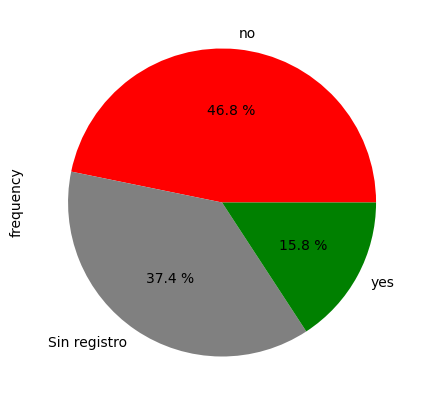

In [67]:
#Gráfico de pastel
colors = ['red', 'gray', 'green']
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=False, autopct="%0.1f %%", colors=colors)
plt.show()


**Análisis e Interpretación**

La mayoría de los comercios de retail no aceptan dar crédito a los clientes. El famoso "no fío" de las tienditas se traslada a lo numérico. Está claro que los retailers regulados y con tecnología no dan, sin embargo existen otros tipos que es probable que si, dependiendo de la zona y la población, o si son familiares. 

## **Columna 38_average_margin_profits**





In [68]:
#Análisis variado de la columna
table11= freq_tbl(df['38_average_margin_profits'])
table11

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,Sin registro,105,0.614035,0.614035
1,30%,15,0.087719,0.701754
2,20%,9,0.052632,0.754386
3,5%,9,0.052632,0.807018
4,40%,6,0.035088,0.842105
5,50% +,6,0.035088,0.877193
6,15%,6,0.035088,0.912281
7,10%,6,0.035088,0.947368
8,35%,4,0.023392,0.970760
9,25%,4,0.023392,0.994152


In [69]:
#Filtro de valores mayores al número seleccionado
Filtro= table11[table11['frequency']>1]
Filtro

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,Sin registro,105,0.614035,0.614035
1,30%,15,0.087719,0.701754
2,20%,9,0.052632,0.754386
3,5%,9,0.052632,0.807018
4,40%,6,0.035088,0.842105
5,50% +,6,0.035088,0.877193
6,15%,6,0.035088,0.912281
7,10%,6,0.035088,0.947368
8,35%,4,0.023392,0.970760
9,25%,4,0.023392,0.994152


In [70]:
#Ajustar índice
Filtro_index= Filtro.set_index('38_average_margin_profits')
Filtro_index

,frequency,percentage,cumulative_perc
38_average_margin_profits,,,
Sin registro,105,0.614035,0.614035
30%,15,0.087719,0.701754
20%,9,0.052632,0.754386
5%,9,0.052632,0.807018
40%,6,0.035088,0.842105
50% +,6,0.035088,0.877193
15%,6,0.035088,0.912281
10%,6,0.035088,0.947368
35%,4,0.023392,0.970760


Text(0, 0.5, 'Frecuencia')

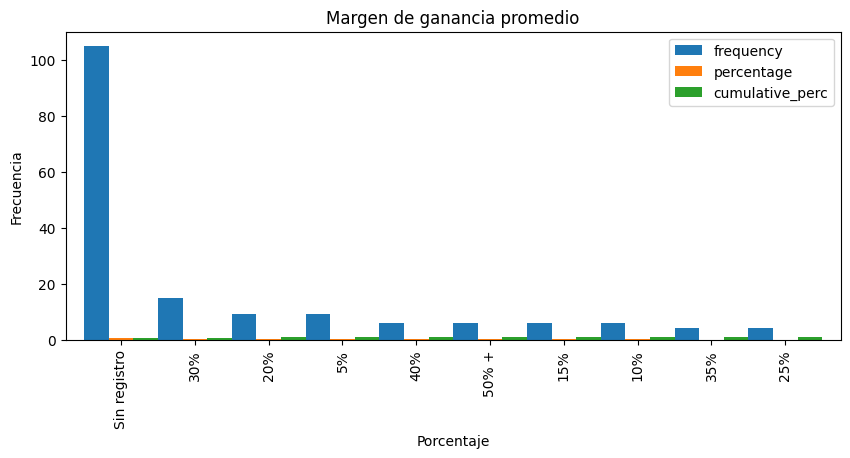

In [73]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Margen de ganancia promedio')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**

Se puede observar que hay muchos elementos sin registro, lo que converge con lo anterior mencionado; muchas personas y dueños de comercios pequeños tienden a desconfiar y no desean compartir su margen promedio de ganancia. También es muy probable que un porcentaje significativo no lo sepa. El margen con mayor frecuencia es 30%, lo que es un promedio correcto para el estandar de la industria. 

## **Columna 313_home_deliveries**

In [74]:
#Análisis variado de la columna
table12= freq_tbl(df['313_home_deliveries'])
table12

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Sin registro,113,0.660819,0.660819
1,Totalmente en desacuerdo,25,0.146199,0.807018
2,Totalmente de acuerdo,14,0.081871,0.888889
3,Algo de acuerdo,11,0.064327,0.953216
4,Algo en desacuerdo,5,0.029240,0.982456
5,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [75]:
#Filtro de valores mayores al número seleccionado
Filtro= table12[table12['frequency']>1]
Filtro

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Sin registro,113,0.660819,0.660819
1,Totalmente en desacuerdo,25,0.146199,0.807018
2,Totalmente de acuerdo,14,0.081871,0.888889
3,Algo de acuerdo,11,0.064327,0.953216
4,Algo en desacuerdo,5,0.029240,0.982456
5,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [76]:
#Ajustar índice
Filtro_index= Filtro.set_index('313_home_deliveries')
Filtro_index

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Sin registro,113,0.660819,0.660819
Totalmente en desacuerdo,25,0.146199,0.807018
Totalmente de acuerdo,14,0.081871,0.888889
Algo de acuerdo,11,0.064327,0.953216
Algo en desacuerdo,5,0.029240,0.982456
Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


<Axes: ylabel='frequency'>

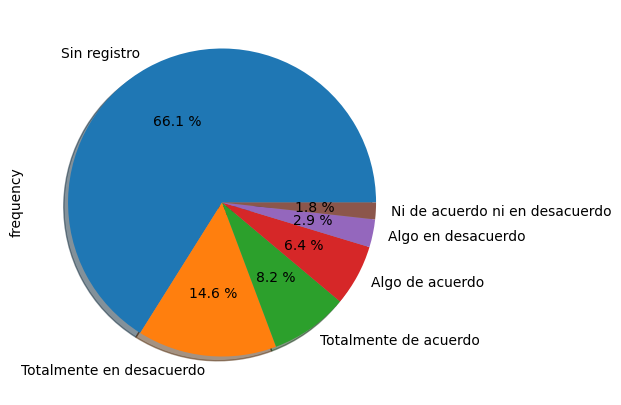

In [77]:
#Gráfico de pastel
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Análisis e Interpretación**

Se puede observar que después de elementos sin registro, los retailers están totalmente en desacuerdo en realizar entregas a domicilio. Esto es debido a que la mayor parte de pequeñas tiendas no cuenta con la infraestructura para realizar dichos pedidos, y además no es completamente necesario, debido a que las grandes compañías de delivery ya realizan el servicio. 

## **Columna 56_procurement_changes_pandemic**


In [78]:
#Análisis variado de la columna
table13= freq_tbl(df['56_procurement_changes_pandemic'])
table13

,56_procurement_changes_pandemic,frequency,percentage,cumulative_perc
0,Sin registro,90,0.526316,0.526316
1,no,55,0.321637,0.847953
2,yes,26,0.152047,1.000000


In [79]:
#Filtro de valores mayores al número seleccionado
Filtro= table13[table13['frequency']>1]
Filtro

,56_procurement_changes_pandemic,frequency,percentage,cumulative_perc
0,Sin registro,90,0.526316,0.526316
1,no,55,0.321637,0.847953
2,yes,26,0.152047,1.000000


In [80]:
#Ajustar índice
Filtro_index= Filtro.set_index('56_procurement_changes_pandemic')
Filtro_index

,frequency,percentage,cumulative_perc
56_procurement_changes_pandemic,,,
Sin registro,90,0.526316,0.526316
no,55,0.321637,0.847953
yes,26,0.152047,1.000000


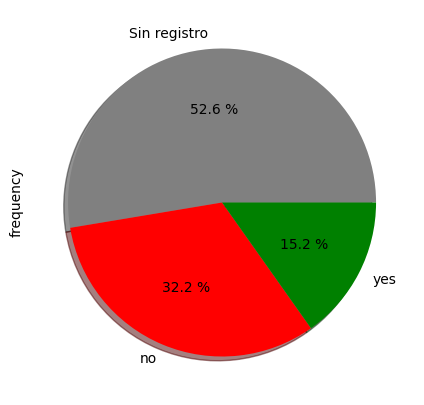

In [82]:
#Gráfico de pastel
colors = ['gray', 'red', 'green']
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%", colors=colors)
plt.show()


**Análisis e Interpretación**

Se puede observar que la mayor parte de los pequeños retailers no conservan los cambios adquiridos durante pandemia, pudiendo ser mantener una correcta limpieza o sana distancia. 

## **Columna 157_frequency_organize_shelves**


In [83]:
#Análisis variado de la columna
table14= freq_tbl(df['157_frequency_organize_shelves'])
table14

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Sin registro,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608
6,Anualmente,2,0.011696,0.988304
7,Semestralmente,1,0.005848,0.994152
8,No se tiene,1,0.005848,1.000000


In [84]:
#Filtro de valores mayores al número seleccionado
Filtro= table14[table14['frequency']>1]
Filtro

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Sin registro,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608
6,Anualmente,2,0.011696,0.988304


In [85]:
#Ajustar índice
Filtro_index= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Sin registro,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608
Anualmente,2,0.011696,0.988304


Text(0, 0.5, 'Frecuencia')

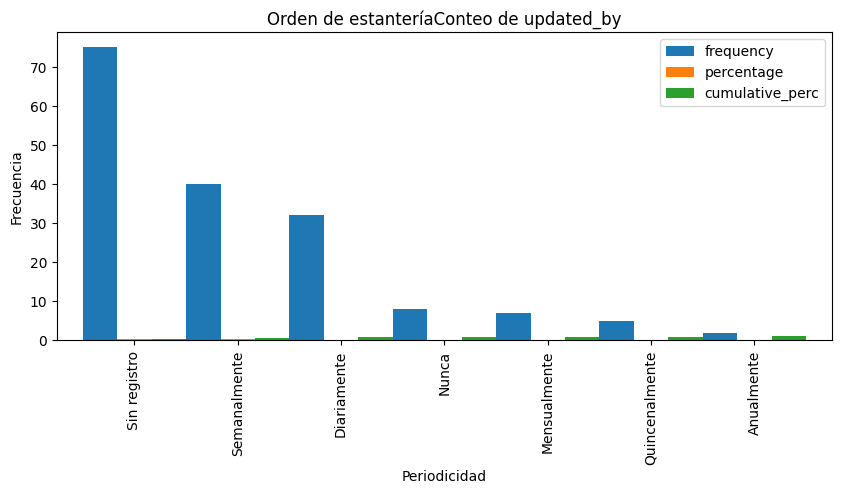

In [86]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Orden de estanteríaConteo de updated_by')
plt.xlabel('Periodicidad')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**

Un insight relevante dentro de esta variable es que la gran mayoría de las tiendas de retail realizan el orden de estantería una o más veces a la semana. Esto se puede explicar debido a que manejan menos inventario y sus proveedores llegan en días de la semana diferentes, manejando un volumen menor de productos a comparación de grandes cadenas comerciales. Esto también representa una acción correcta para mantener orden, imagen y limpieza. 

## **Columna 163_number_high_perishable_products**

In [87]:
#Análisis variado de la columna
table15= freq_tbl(df['163_number_high_perishable_products'])
table15

,163_number_high_perishable_products,frequency,percentage,cumulative_perc
0,Sin registro,93,0.543860,0.543860
1,0.0,36,0.210526,0.754386
2,20.0,9,0.052632,0.807018
3,2.0,5,0.029240,0.836257
4,1.0,4,0.023392,0.859649
5,5.0,4,0.023392,0.883041
6,6.0,3,0.017544,0.900585
7,15.0,3,0.017544,0.918129
8,10.0,2,0.011696,0.929825
9,60.0,2,0.011696,0.941520


In [88]:
#Filtro de valores mayores al número seleccionado
Filtro= table15[table15['frequency']>1]
Filtro

,163_number_high_perishable_products,frequency,percentage,cumulative_perc
0,Sin registro,93,0.543860,0.543860
1,0.0,36,0.210526,0.754386
2,20.0,9,0.052632,0.807018
3,2.0,5,0.029240,0.836257
4,1.0,4,0.023392,0.859649
5,5.0,4,0.023392,0.883041
6,6.0,3,0.017544,0.900585
7,15.0,3,0.017544,0.918129
8,10.0,2,0.011696,0.929825
9,60.0,2,0.011696,0.941520


In [89]:
#Ajustar índice
Filtro_index= Filtro.set_index('163_number_high_perishable_products')
Filtro_index

,frequency,percentage,cumulative_perc
163_number_high_perishable_products,,,
Sin registro,93,0.543860,0.543860
0.0,36,0.210526,0.754386
20.0,9,0.052632,0.807018
2.0,5,0.029240,0.836257
1.0,4,0.023392,0.859649
5.0,4,0.023392,0.883041
6.0,3,0.017544,0.900585
15.0,3,0.017544,0.918129
10.0,2,0.011696,0.929825


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

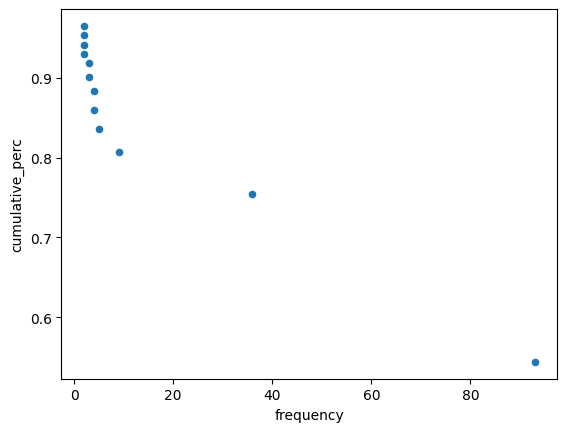

In [90]:
#Gráfico de dispersión
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

**Análisis e Interpretación**

La mayor parte de las tiendas no conservan productos perecederos, sin embargo se tienen 9 registros con 20 productos, pudiendo ser pequeños retailers que incluyen en sus productos carnes o lácteos. 

## **Columna 250_technology_investment_operations**


In [91]:
#Análisis variado de la columna
table16= freq_tbl(df['250_technology_investment_operations'])
table16

,250_technology_investment_operations,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente de acuerdo,34,0.198830,0.766082
2,De acuerdo,20,0.116959,0.883041
3,Totalmente en desacuerdo,8,0.046784,0.929825
4,En desacuerdo,6,0.035088,0.964912
5,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [92]:
#Filtro de valores mayores al número seleccionado
Filtro= table16[table16['frequency']>1]
Filtro

,250_technology_investment_operations,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente de acuerdo,34,0.198830,0.766082
2,De acuerdo,20,0.116959,0.883041
3,Totalmente en desacuerdo,8,0.046784,0.929825
4,En desacuerdo,6,0.035088,0.964912
5,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [93]:
#Ajustar índice
Filtro_index= Filtro.set_index('250_technology_investment_operations')
Filtro_index

,frequency,percentage,cumulative_perc
250_technology_investment_operations,,,
Sin registro,97,0.567251,0.567251
Totalmente de acuerdo,34,0.198830,0.766082
De acuerdo,20,0.116959,0.883041
Totalmente en desacuerdo,8,0.046784,0.929825
En desacuerdo,6,0.035088,0.964912
Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


<Axes: ylabel='frequency'>

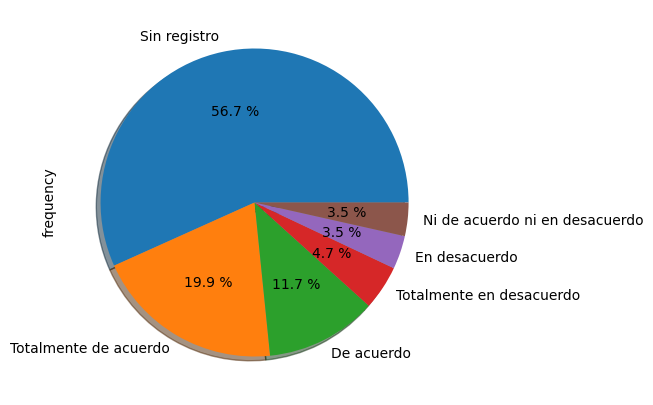

In [94]:
#Gráfico de pastel
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Análisis e Interpretación**

Una mayoría importante de aquellas filas con registro indica que los pequeños retialers están de acuerdo en invertir en tecnologías para su operación. Esto puede coincidir con la tendencia de cobro por transferencia bancaria, por ejemplo con herramientas como clip y el avance de nuevas herramientas al alcance de la mayoría. 

## **Columna 234_willingness_participate_workshop**

In [95]:
#Análisis variado de la columna
table17= freq_tbl(df['234_willingness_participate_workshop'])
table17

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,Sin registro,73,0.426901,0.426901
1,no,49,0.286550,0.713450
2,yes,49,0.286550,1.000000


In [96]:
#Filtro de valores mayores al número seleccionado
Filtro= table17[table17['frequency']>1]
Filtro

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,Sin registro,73,0.426901,0.426901
1,no,49,0.286550,0.713450
2,yes,49,0.286550,1.000000


In [97]:
#Ajustar índice
Filtro_index= Filtro.set_index('234_willingness_participate_workshop')
Filtro_index

,frequency,percentage,cumulative_perc
234_willingness_participate_workshop,,,
Sin registro,73,0.426901,0.426901
no,49,0.286550,0.713450
yes,49,0.286550,1.000000


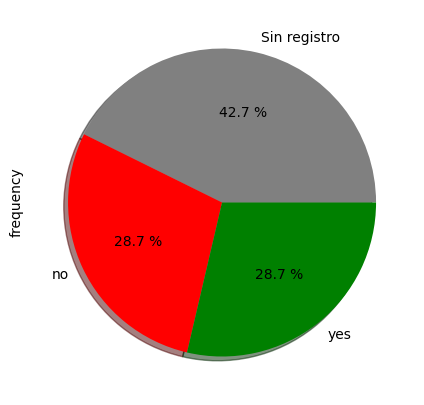

In [98]:
#Gráfico de pastel
colors = ['grey', 'red', 'green']
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%", colors=colors)
plt.show()


**Análisis e Interpretación**

Una opinión dividida en 50% para aquellos retailers de los que se tiene registro. En muchas ocasiones los dueños de tiendas no desean colaborar debido a una cultura de desconfianza o porque no encuentran sentido a realizar estudios en conjunto, sin embargo, se deberá analizar el contexto del workshop propuesto. 

## **Columna 312_payment_of_utilities**

In [99]:
#Análisis variado de la columna
table18= freq_tbl(df['312_payment_of_utilities'])
table18

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Sin registro,105,0.614035,0.614035
1,Totalmente en desacuerdo,46,0.269006,0.883041
2,Totalmente de acuerdo,9,0.052632,0.935673
3,Algo de acuerdo,5,0.029240,0.964912
4,Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
5,Algo en desacuerdo,2,0.011696,1.000000


In [100]:
#Filtro de valores mayores al número seleccionado
Filtro= table18[table18['frequency']>1]
Filtro

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Sin registro,105,0.614035,0.614035
1,Totalmente en desacuerdo,46,0.269006,0.883041
2,Totalmente de acuerdo,9,0.052632,0.935673
3,Algo de acuerdo,5,0.029240,0.964912
4,Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
5,Algo en desacuerdo,2,0.011696,1.000000


In [101]:
#Ajustar índice
Filtro_index= Filtro.set_index('312_payment_of_utilities')
Filtro_index

,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
Sin registro,105,0.614035,0.614035
Totalmente en desacuerdo,46,0.269006,0.883041
Totalmente de acuerdo,9,0.052632,0.935673
Algo de acuerdo,5,0.029240,0.964912
Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
Algo en desacuerdo,2,0.011696,1.000000


<Axes: ylabel='frequency'>

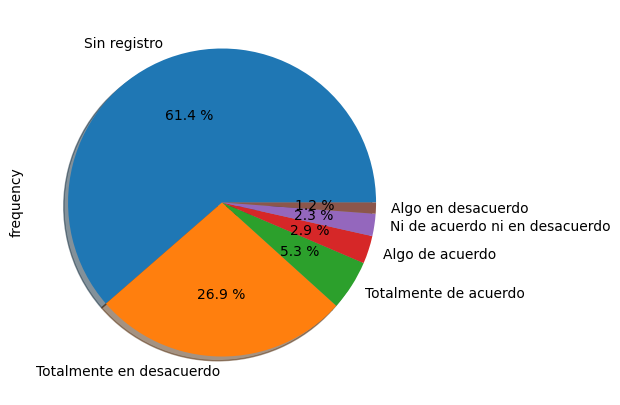

In [102]:
#Gráfico de pastel
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Análisis e Intepretación**

La mayoría de los pequeños retialers no estan de acuerdo en invertir en mayor infraesturcutura (utilities) tantp físicas como en servicios. Esto puede ser un síntoma de un bloqueo en el crecimiento de su operación. Muchas tiendas no cuentan con servicios importantes y muchas menos tienen infraestcutura para aceptar pagos de servicios por ejemplo. 

## **Columna 214_customer_relationship_tools**

In [103]:
#Análisis variado de la columna
table19= freq_tbl(df['214_customer_relationship_tools'])
table19

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Sin registro,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


In [104]:
#Filtro de valores mayores al número seleccionado
Filtro= table19[table19['frequency']>1]
Filtro

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Sin registro,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216


In [105]:
#Ajustar índice
Filtro_index= Filtro.set_index('214_customer_relationship_tools')
Filtro_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Sin registro,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216


Text(0, 0.5, 'Frecuencia')

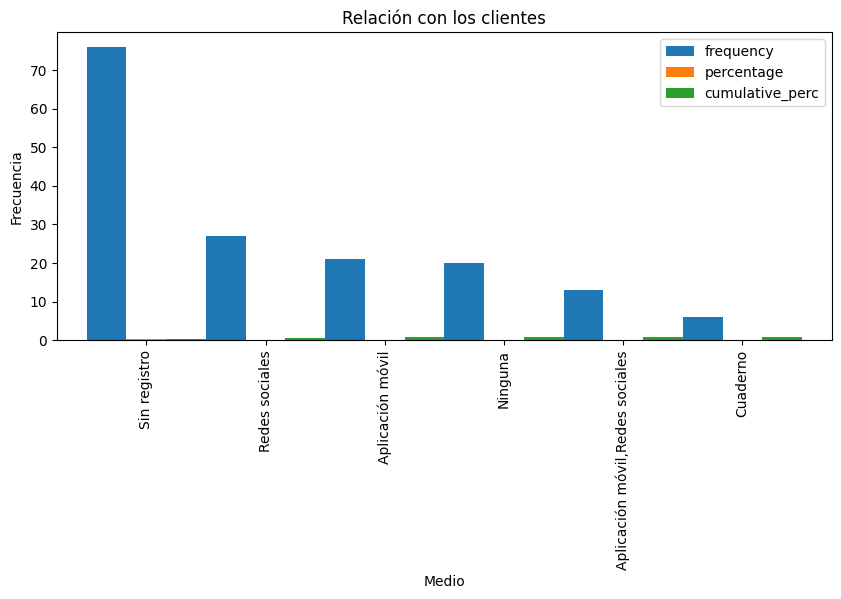

In [106]:
#Gráfico de barras
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Relación con los clientes')
plt.xlabel('Medio')
plt.ylabel('Frecuencia')

**Análisis e Interpretación**

Se puede observar que el principal medio por el cual se relacionan los retailers con sus clientes es por redes sociales. Esta tendencia ha credido demasiado a tal punto de que en ocasiones aporta más del 50% de su canalización de clientes. Por otro lado, la aplicación móvil puede referirse a una relación directa con las empresas de delivery, cuya siergia apoya las ventas de las tiendas. 

## **Columna 227_agreement_ecommerce_platforms**


In [107]:
#Análisis variado de la columna
table20= freq_tbl(df['227_agreement_ecommerce_platforms'])
table20

,227_agreement_ecommerce_platforms,frequency,percentage,cumulative_perc
0,no,88,0.514620,0.51462
1,Sin registro,73,0.426901,0.94152
2,yes,10,0.058480,1.00000


In [108]:
#Filtro de valores mayores al número seleccionado
Filtro= table20[table20['frequency']>1]
Filtro

,227_agreement_ecommerce_platforms,frequency,percentage,cumulative_perc
0,no,88,0.514620,0.51462
1,Sin registro,73,0.426901,0.94152
2,yes,10,0.058480,1.00000


In [109]:
#Ajustar índice
Filtro_index= Filtro.set_index('227_agreement_ecommerce_platforms')
Filtro_index

,frequency,percentage,cumulative_perc
227_agreement_ecommerce_platforms,,,
no,88,0.514620,0.51462
Sin registro,73,0.426901,0.94152
yes,10,0.058480,1.00000


<Axes: ylabel='frequency'>

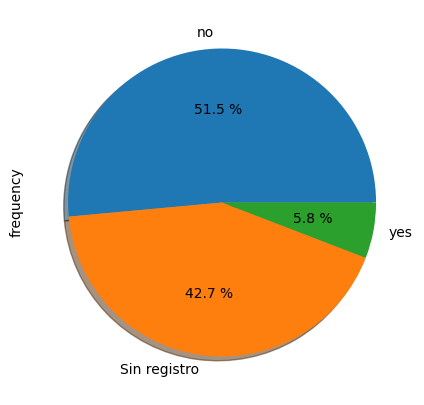

In [110]:
#Gráfico de pastel
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Análisis e Intepretación**

Siguiendo la lógica del análisis, muchos pequeños retialers no tienen el objetivo de lograr alianzas con plataformas de e-commerce, pues es complicado para aquellos que no tienen infraestructura y en ocasiones su ganancia se ve reducida. 

## **Exportar**

In [111]:
%%shell
jupyter nbconvert --to html Actividad_4_Extracción_características_A01734153.ipynb

[NbConvertApp] Converting notebook Actividad_4_Extracción_características_A01734153.ipynb to html
[NbConvertApp] Writing 1832627 bytes to Actividad_4_Extracción_características_A01734153.html
